# 零极点分析
这是一个关于零极点分析的代码

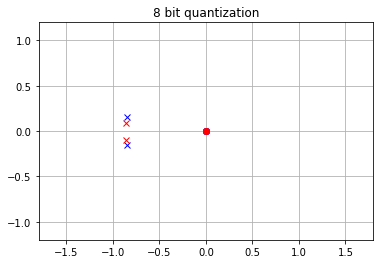

In [3]:
import matplotlib.pyplot as plt

import numpy as np

from scipy import signal

from matplotlib.patches import Circle

 
N = 8 # quantization bits

Fs = 1000 # sampling frequency

a = np.array([1, 1.7, 0.745]) # denominator

b = np.array([0.05, 0, 0]) # numerator

 
# z zero, p pole, k gain

z1, p1, k1 = signal.tf2zpk(b,a) # zero, pole and gain

 
c = np.vstack((a,b))

Max = (abs(c)).max() #find the largest value

a = a / Max #normalization

b = b / Max

 
Ra = (a * (2**((N-1)-1))).astype(int) # quantizan and truncate

Rb = (b * (2**((N-1)-1))).astype(int)

z2, p2, k2 = signal.tf2zpk(Rb,Ra)

 
fig, ax = plt.subplots()

circle = Circle(xy = (0.0, 0.0), radius = 1, alpha = 0.9, facecolor = 'white')

ax.add_patch(circle)

for i in p1:

 ax.plot(np.real(i),np.imag(i), 'bx') #pole before quantization

for i in z1:

 ax.plot(np.real(i),np.imag(i),'bo') #zero before quantization

for i in p2:

 ax.plot(np.real(i),np.imag(i), 'rx') #pole after quantization

for i in z2:

 ax.plot(np.real(i),np.imag(i),'ro') #zero after quantization

 
 
ax.set_xlim(-1.8,1.8)

ax.set_ylim(-1.2,1.2)

ax.grid()

ax.set_title("%d bit quantization" %N)

plt.show()